# ExtraCredit3 - Pedestrian simulation

### SungJun(Tony), Baek. CSE5280

Due: Tuesday, April 8th

```
Repeat the previous experiment but this time use two particles. In this case, you want to visualize the gradient vector field for situations when the particles are close enough to each other to cause "repulsion" in the (negative) gradient and also when they are far enough to not suffer any influence from each others obstacle-avoidance term of the cost function.
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols
from sympy.plotting import plot3d

## Setup the map from the previous part

In [4]:
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
X,Y = np.meshgrid(x,y)

In [10]:
#Must return (xSize * ySize) size of array
def normMatrix(endX, endY, xSize, ySize):
    coordinateList = []
    norm_vector_X = []
    norm_vector_Y = []
    for y in range(ySize):
        for x in range(xSize):
            distance = [(endX - x), (endY - y)]
            norm = math.sqrt(distance[0] ** 2 + distance[1] ** 2)
            direction = [distance[0] / norm, distance[1] / norm]
            norm_vector_X.append(direction[0] * math.sqrt(2))
            norm_vector_Y.append(direction[1] * math.sqrt(2))
    return norm_vector_X, norm_vector_Y

#Returns z-based value from near 0 to near 1 ratio to the entire map
def z_gradientMatrix(endX, endY, xSize, ySize):
    norm_vector_Z = []
    for y in range(ySize):
        z_list =[]
        for x in range(xSize):
            distance = [(endX - x), (endY - y)]
            measure = distance[0] ** 2 + distance[1] ** 2
            normalized = measure / (xSize * ySize)
            z_list.append(normalized)
        norm_vector_Z.append(z_list)
    return np.array(norm_vector_Z)

def single_cylinder(xPos, yPos, trueRadius, affectedRadius ,xSize, ySize):
    if (trueRadius > affectedRadius):
        print("This will allow particle to go into the obstacles")
    z_matrix = []
    for y in range (ySize):
        row_matrix = []
        for x in range(xSize):
            #Calculate distance
            partial_distance = [(xPos - x), (yPos - y)]
            distance = math.sqrt(partial_distance[0] ** 2 + partial_distance[1] ** 2)
            #Normalized will have value between 0 ~ 1
            normalized = (xSize - distance) / xSize
            if(distance >= affectedRadius):
                row_matrix.append(0)
            elif(distance < affectedRadius and distance > trueRadius):
                gradient_increase = (normalized - 0.9) * 2
                row_matrix.append(gradient_increase)
            else:
                row_matrix.append(normalized)
        z_matrix.append(row_matrix)
    return z_matrix

In [149]:
#Exit location at x = 100, y = 0, z= 50 -> (100, 50)
endPos = (50, 100)

ux, uy = normMatrix(endPos[0], endPos[1], 100, 100) #Euclidean distance on each point 
uz = z_gradientMatrix(endPos[0], endPos[1], 100, 100)
v = 0 #Vector set 0 to use only norm value(directional value)

#Five cylinder coordinates
cylinder_1 = (50 ,90)
cylinder_2 = (40, 80)
cylinder_3 = (30, 70)
cylinder_4 = (20, 60)
cylinder_5 = (10, 50)

cylinder_1_cost = single_cylinder(cylinder_1[0], cylinder_1[1], 3, 10, len(X), len(Y))
cylinder_2_cost = single_cylinder(cylinder_2[0], cylinder_2[1], 3, 10, len(X), len(Y))
cylinder_3_cost = single_cylinder(cylinder_3[0], cylinder_3[1], 3, 10, len(X), len(Y))
cylinder_4_cost = single_cylinder(cylinder_4[0], cylinder_4[1], 3, 10, len(X), len(Y))
cylinder_5_cost = single_cylinder(cylinder_5[0], cylinder_5[1], 3, 10, len(X), len(Y))

total_cylinder = np.add(cylinder_1_cost, cylinder_2_cost)
total_cylinder = np.add(total_cylinder, cylinder_3_cost)
total_cylinder = np.add(total_cylinder, cylinder_4_cost)
total_cylinder = np.add(total_cylinder, cylinder_5_cost)
total_cost = np.add(total_cylinder, uz)

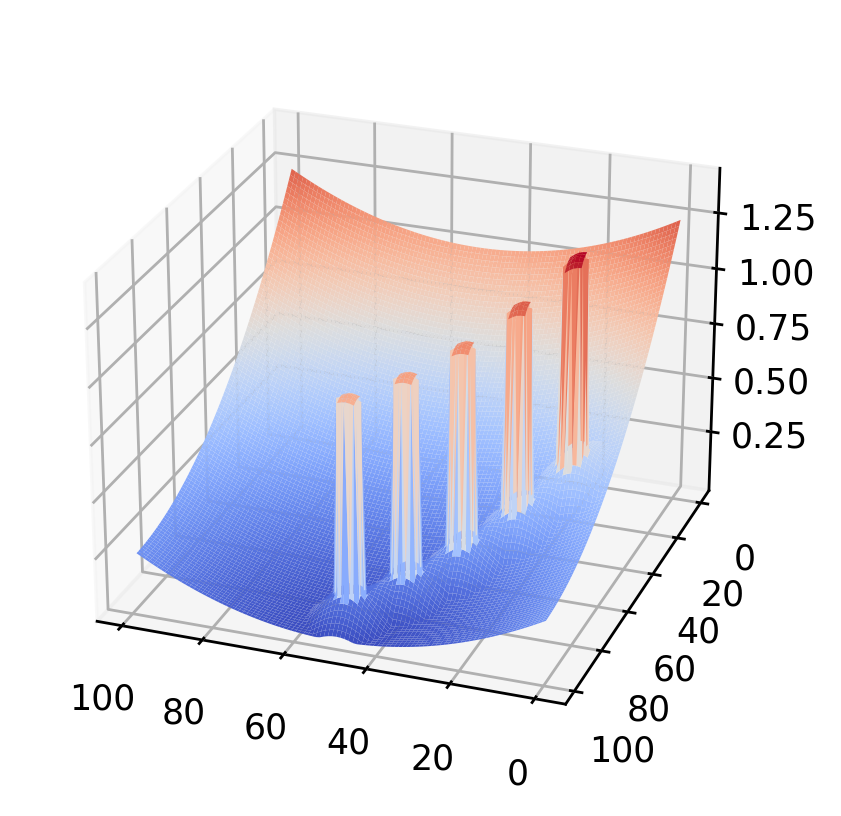

In [150]:
from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(25, 110)
ax.plot_surface(X, Y, total_cost, cmap=cm.coolwarm, rstride = 1,  cstride = 1)
plt.show()

## Represent particle repulsion

The highest cost represents the particle size because any other particles are not allowed to intersect with other particles within its shape.

In [151]:
particles = [(50, 5), (20, 5)]

In [266]:
def single_particle(xPos, yPos ,xSize, ySize, particleSize):
    #Particle must have certain value of repulsion
    z_matrix = []
    for y in range (ySize):
        row_matrix = []
        for x in range(xSize):
            #Calculate distance
            partial_distance = [(xPos - x), (yPos - y)]
            distance = math.sqrt(partial_distance[0] ** 2 + partial_distance[1] ** 2)
            #distance within the radius value ranged from 0 ~ radius
            if (distance < particleSize):
                row_matrix.append(0.3)
            else:
                normalized = ((1 / distance) * 0.1)
                row_matrix.append(normalized)

        z_matrix.append(row_matrix)
    return np.array(z_matrix)

particle_one = single_particle(particles[0][0], particles[0][1], len(X), len(Y), 2)
particle_two = single_particle(particles[1][0], particles[1][1], len(X), len(Y), 2)
totoal_particles = np.add(particle_one, particle_two)

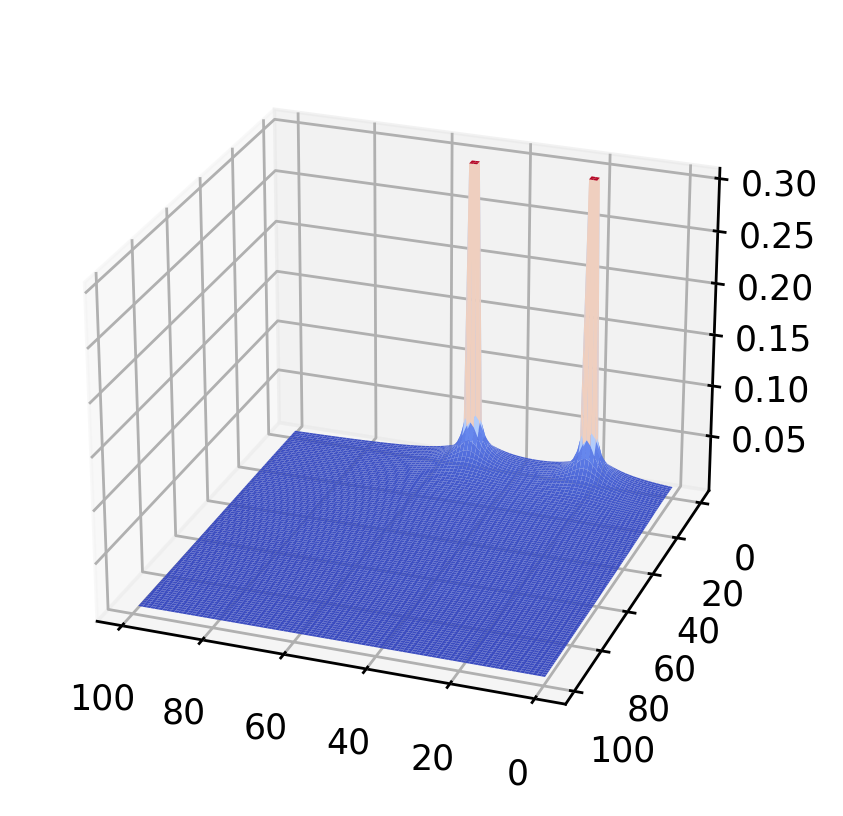

In [267]:
from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(25, 110)
ax.plot_surface(X, Y, totoal_particles, cmap=cm.coolwarm, rstride = 1,  cstride = 1)
plt.show()

## Particles with repulsive gradient on the entire map

5 stationary obstacles near the exit, 2 dynamic particles near the edge of the map.

In [268]:
total_map = np.add(total_cost, totoal_particles)

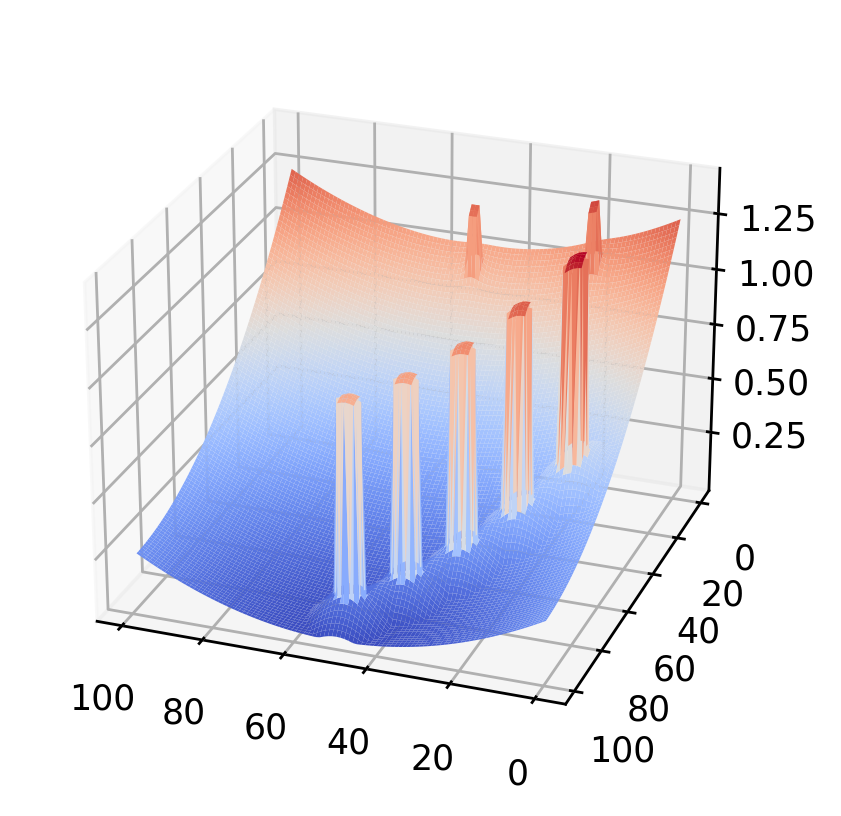

In [269]:
from matplotlib import cm

fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(projection='3d')
ax.view_init(25, 110)
ax.plot_surface(X, Y, total_map, cmap=cm.coolwarm, rstride = 1,  cstride = 1)
plt.show()